In [23]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Pull in CSV paths
csvHL = "Resources/2007-2016-Homelessnewss-USA.csv"
csvRP = "Resources/price.csv"
csvpop = "Resources/datasets_1697_3211_Population-by-state (1).csv"
csvPPSQFT = "Resources/pricepersqft.csv"

In [31]:
#Prep CSV Paths for DataFrames
homeless_data = pd.read_csv(csvHL)
rentprice_data = pd.read_csv(csvRP)
population_data = pd.read_csv(csvpop)
pricepersqft_data = pd.read_csv(csvPPSQFT)
#Set DataFrames
homeless_df = pd.DataFrame(homeless_data)
rentprice_df = pd.DataFrame(rentprice_data)
population_df = pd.DataFrame(population_data)
pricepersqft_df = pd.DataFrame(pricepersqft_data)
#Transform Homeless CSV data to match Zillow Data Form

In [59]:
# Perform Groupby on Rent Data by State with Average rent price
#rentprice_df.filter(['State', 'January 2011', 'January 2016'])
rentprice_mean = rentprice_df.groupby(['State']).mean()
rentprice_mean_years = rentprice_mean.filter(['State',
                                              'January 2011',
                                              'January 2012',
                                              'January 2013',
                                              'January 2014',
                                              'January 2015',
                                              'January 2016',
                                             ])

#Re-name columns to match format from homeless DF
rentprice_mean_years.columns = ['RP2011',
                                'RP2012',
                                'RP2013',
                                'RP2014',
                                'RP2015',
                                'RP2016'
                               ]
#rentprice_mean_years

rentprice_final = rentprice_mean_years.filter(['RP2011', 'RP2016'])
rentprice_final["RP Var"] = rentprice_final["RP2016"] - rentprice_final["RP2011"]
rentprice_final["RP % CHG"] = rentprice_final["RP Var"] / rentprice_final["RP2011"] * 100
rentprice_final.reset_index(inplace=True)
rentprice_final
#rentprice_final.max()
                                    

,State,RP2011,RP2016,RP Var,RP % CHG
0,AK,NaN,1644.000000,NaN,NaN
1,AL,959.351648,1023.484305,64.132657,6.685000
2,AR,828.773050,943.687075,114.914025,13.865560
3,AZ,1197.033613,1233.605042,36.571429,3.055171
4,CA,2019.433604,2322.005376,302.571772,14.983002
5,CO,1397.872611,1712.449438,314.576827,22.503970
6,CT,1732.548571,1833.931429,101.382857,5.851660
7,DC,2241.000000,2535.000000,294.000000,13.119143
8,DE,1328.921053,1351.842105,22.921053,1.724787
9,FL,1400.312734,1642.417440,242.104706,17.289331


In [54]:
rentprice_final
colunm = rentprice_final['RP Var']
max_value = colunm.max()
print(max_value)

461.73511520737316


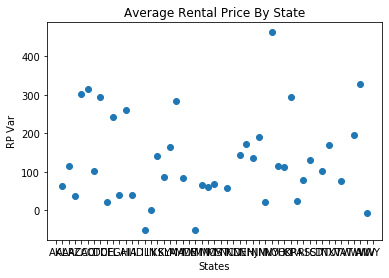

In [35]:
plt.scatter(rentprice_final['State'],rentprice_final['RP Var'])
plt.xlabel('States')
plt.ylabel('RP Var')
plt.title('Average Rental Price By State')
plt.show()

In [60]:
homeless_pdf

NameError: name 'homeless_pdf' is not defined

In [61]:
rentprice_mean_years

,RP2011,RP2012,RP2013,RP2014,RP2015,RP2016
State,,,,,,
AK,NaN,1507.666667,1519.166667,1595.583333,1568.000000,1644.000000
AL,959.351648,968.664835,959.551570,975.834081,1005.094170,1023.484305
AR,828.773050,856.673759,907.251701,927.312925,939.027211,943.687075
AZ,1197.033613,1178.033613,1167.621849,1175.823529,1200.117647,1233.605042
CA,2019.433604,1953.310298,1956.299731,2016.633065,2190.813172,2322.005376
CO,1397.872611,1423.974522,1446.089888,1494.853933,1600.837079,1712.449438
CT,1732.548571,1739.525714,1722.914286,1751.468571,1785.834286,1833.931429
DC,2241.000000,2335.000000,2411.000000,2482.000000,2433.000000,2535.000000
DE,1328.921053,1273.315789,1254.578947,1287.578947,1331.578947,1351.842105
